Assignment 1 : Creating a Word document matrix

In [40]:
#importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity

In [41]:
#setting path for the dataset
dataset_path = "C:/Users/Anusha Gadgil/Desktop/Deep learning/Assignment1_data"

In [42]:
#Initializing an empty list
text_data = []

In [43]:
#Looping through each file in the directory 
for filename in os.listdir(dataset_path):
    if filename.endswith(".txt"):  
        file_path = os.path.join(dataset_path, filename)
        try:
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
# Reading the content of the file and adding it to the list
                text_data.append(file.read())
        except UnicodeDecodeError as e:
            print(f"Error decoding file {filename}: {e}")
text_data_lower = [text.lower() for text in text_data]




In [44]:
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

In [45]:
# Creating the word-document matrix
word_document_matrix = vectorizer.fit_transform(text_data_lower).toarray()

# Getting the feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

Matrix A: M = 20, N = 1147


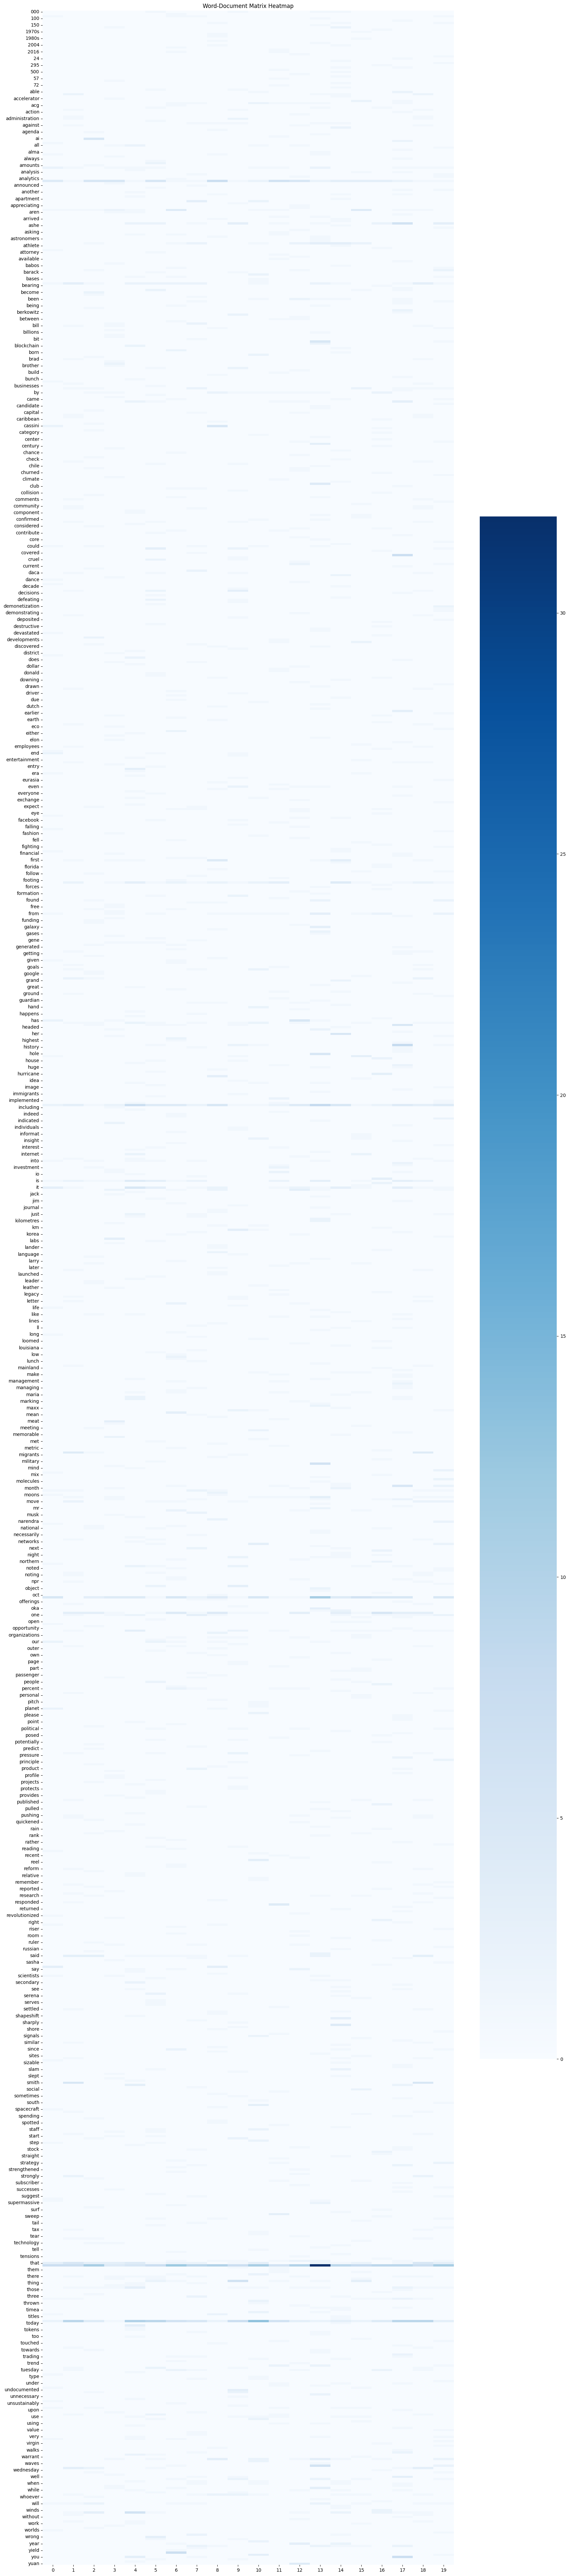

In [46]:
# Step 3: Displaying Matrix A
M, N = word_document_matrix.shape
print(f"Matrix A: M = {M}, N = {N}")

# Step 4: Visualizing the Matrix A

# Convert the matrix to a DataFrame for visualization
df_matrix = pd.DataFrame(word_document_matrix, columns=feature_names)

# Create a heatmap visualization with a wider plot
plt.figure(figsize=(20, 100))
sns.heatmap(df_matrix.T, cmap='Blues', xticklabels='auto', yticklabels='auto')  
plt.title("Word-Document Matrix Heatmap")
plt.show()

In [47]:
# Create a TfidfTransformer instance
tfidf_transformer = TfidfTransformer()

# Compute TF-IDF scores for the word-document matrix
tfidf_matrix = tfidf_transformer.fit_transform(word_document_matrix)

# Convert the TF-IDF matrix to a DataFrame for visualization
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Display the TF-IDF matrix
print("TF-IDF Matrix:")
print(df_tfidf)

TF-IDF Matrix:
         000        07        10       100        14        15       150  \
0   0.000000  0.000000  0.087268  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5   0.063145  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6   0.000000  0.073896  0.053692  0.000000  0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.071032  0.000000  0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000  0.000000  0.065619  0.000000   
9   0.060130  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000 

In [48]:

# tfidf matrix contains the tfidf score of all words

# Index of the document "10.txt" 
document_index_10 = 9

# Calculating cosine similarity between "10.txt" and all other documents
cosine_similarities = cosine_similarity(tfidf_matrix[document_index_10].reshape(1, -1), tfidf_matrix)

# Getting the indices of the top 3 most similar documents
similar_documents_indices = cosine_similarities.argsort()[0][-4:-1][::-1]

# Displaying the most similar documents
print(f"\n3 most similar documents to '10.txt':")
for index in similar_documents_indices:
    print(f"Document {index + 1}")



3 most similar documents to '10.txt':
Document 6
Document 16
Document 2


# Assuming 'word_document_matrix' contains the word-document matrix (original counts, not TF-IDF)

# Getting the number of documents (N)
N = word_document_matrix.shape[1]

# Creating a new matrix B of size N x N
B = np.zeros((N, N))


In [53]:
# Calculating the number of common words between each pair of documents
for i in range(N):
    for j in range(N):
# Excluding the diagonal 
        if i != j:
# Counting the number of common words between documents i and j
            B[i, j] = np.sum((word_document_matrix[:, i] > 0) & (word_document_matrix[:, j] > 0))

# Setting the diagonal values to the maximum count for each document
np.fill_diagonal(B, np.max(B, axis=1))


In [54]:
# Displaying the matrix B
print("\nMatrix B - Common Words:")
print(B)


Matrix B - Common Words:
[[4. 0. 0. ... 2. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 4. ... 0. 0. 0.]
 ...
 [2. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
Conclusion:The number of common words between matrices are 1147.